Today's date is 2023-01-24 and your desk wishes to buy options on WORLD INDEX. WORLD INDEX is currently trading at 4153. It has a constant continuous dividend yield of 3.6\%, and volatility of 18\%. The current interest rate is 2\%.

(Q1) What is your best estimate of the 2023-12-15 WORLD INDEX forward price?

(Q2) Write a function (or a set of functions) to simulate GBM paths.The function should be called gbm_paths. It should output an $(m+1) \times n$ pandas DataFrame, where $m$ is the number of equal time steps in the partition of $[0, t]$, and $n$ is the number of price paths requested by the user. Each column of the output should thus contain a seperate simulation path, and the index of the pandas DataFrame should partition $[0,t]$.

Use $m=100$ and $n=10$. Print the output of this function.

(Q3) Using the same parameters, provide a visualisation of the paths you've generated in (Q2). This should be implemented by another function called plot_gbm_paths. Ideally this function should call the function in (Q2).

(Q4) Write a function (or a set of functions) for option pricing and price the following options under your Monte-Carlo framework:

4200 strike 2023-12-15 expiry European put option
4200 strike 2023-12-15 expiry European call option
To get accurate prices, you can select your own $m$ and $n$.

(Q5) Write a function (or a set of functions) to calculate deltas for options in (Q4) under the same Monte-Carlo framework.

(Q6) Comment on the convergence of the Monte-Carlo simulations in (Q4) and (Q5). Hint: You can run your simulator for a range of path numbers in sequence and check the convergence.

You are welcome to implement the tasks in any way you like. It will be a distinct advantage if you write a class to implement all of the above functionality within a single interface.

Note

Return your answers in the form of a single Jupyter Notebook file, using your name in lower-case as the file's name (e.g. jones_david.ipynb).

Present your answers clearly. Any code you write must be contained within the Jupyter Notebook (no auxiliary *.py files).

A large component of our judgement will pertain to code quality. By code quality we mean, for example, the use of principles such as vectorisation, modularity, comments, documentation, and adherance to style conventions.

You are welcome to use any of the standard Python libraries (numpy, pandas, scipy, ... ).

Ensure your Jupyter Notebook runs on a Python 3.0 kernel.

Explain any decisions or assumptions made.

Finally, don't over-complicate! If you are used to programming in Python, this exercise should just take an hour or two to do well.


## Question 1

forward price calculation:
F = S0 * exp((r- q) * T)

where:
F is the forward price
S0 is the current pricce
r is the risk-free interest rate
q is the dividends yield
T is the time to maturity

hence:
F = 4153 * exp((0.02 - 0.036) * 0.9167)
F = 4090.66

---

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from datetime import datetime

class GBMPriceSimulator:
    def gbm_paths(self, interest_rate, volatility, S0, m, n):
        dt = 1 / m
        price_paths = pd.DataFrame()

        for i in range(n):
            Z = np.random.randn(m)
            S = S0 * np.exp(np.cumsum((interest_rate - 0.5 * volatility ** 2) * dt + volatility * np.sqrt(dt) * Z))

            price_paths[f'Path_{i+1}'] = S

        return price_paths

    def plot_gbm_paths(self, price_paths):
        plt.figure(figsize=(10, 5))
        price_paths.plot(legend=False)
        plt.xlabel('Time')
        plt.ylabel('Price')
        plt.title('Simulated GBM Price Paths')
        plt.grid(True)
        plt.show()
        
    def calculate_date_apart(self, current_date, expiry_date):
        current_date_datetime = datetime.strptime(current_date, '%d%m%Y')
        expiry_date_datetime = datetime.strptime(expiry_date, '%d%m%Y')
        years_between = (expiry_date_datetime - current_date_datetime).days / 365 # time to expiry in years
        
        return years_between

    def calculate_option_price(self, interest_rate, volatility, S0, m, n, option_type, current_date, expiry_date, strike_price):
        prices = self.gbm_paths(interest_rate, volatility, S0, m, n)
        expiry_time = self.calculate_date_apart(current_date, expiry_date)
        option_prices = []

        current_date_datetime = datetime.strptime(current_date, '%d%m%Y')
        expiry_date_datetime = datetime.strptime(expiry_date, '%d%m%Y')
        expiry_time = (expiry_date_datetime - current_date_datetime).days / 365 # time to expiry in years

        for i in range(n):
            S = prices[f'Path_{i+1}']
            S_at_expiry = S.iloc[-1]
            if option_type == 'call':
                option_price = np.maximum(0, S_at_expiry - strike_price)
            elif option_type == 'put':
                option_price = np.maximum(0, strike_price - S_at_expiry)
            #value discounted to have the Present Value of the option
            discounted_price = option_price * np.exp(-interest_rate * (expiry_time))
            option_prices.append(discounted_price)

        option_price = np.mean(option_prices)
        return option_price
    
    def calculate_deltas(self, interest_rate, volatility, S0, current_date, expiry_date):
        expiry_time = self.calculate_date_apart(current_date, expiry_date)
        d1 = (np.log(S0 / strike_price) + (interest_rate + 0.5 * volatility ** 2) * expiry_time) / (volatility * np.sqrt(expiry_time))
        
        if option_type == 'call':
            delta = norm.cdf(d1)
        elif option_type == 'put':
            delta = norm.cdf(d1) - 1
        
        return delta
    
simulator = GBMPriceSimulator()


## Question 2

In [31]:
interest_rate = 0.02
volatility = 0.18
S0 = 4153
m = 100
n = 10

prices = simulator.gbm_paths(interest_rate, volatility, S0, m, n)
#Printing out DataFrame for checking
print(prices)

         Path_1       Path_2       Path_3       Path_4       Path_5  \
0   4083.364959  4109.080847  4167.839355  4156.733398  4166.701637   
1   3983.976123  4131.111945  4164.524735  4102.932099  4374.332536   
2   3955.899133  4042.694657  4099.675878  3982.951272  4377.051432   
3   3929.380615  4056.177019  4019.487143  3894.383709  4473.177322   
4   3872.202638  4154.468306  4107.145150  3870.010234  4439.279717   
..          ...          ...          ...          ...          ...   
95  4188.994878  5108.927991  3280.282927  3513.397242  5168.596951   
96  4144.361875  5194.336274  3262.426106  3541.427625  5133.433119   
97  4087.748007  5184.013650  3240.201686  3491.210658  5094.285264   
98  3991.842286  5238.425311  3261.502267  3699.598606  5073.456503   
99  3996.352509  5567.097589  3281.644640  3618.034311  5257.218137   

         Path_6       Path_7       Path_8       Path_9      Path_10  
0   4142.508878  4172.026677  4196.535437  4170.007534  4031.514557  
1   418

## Question 3

<Figure size 720x360 with 0 Axes>

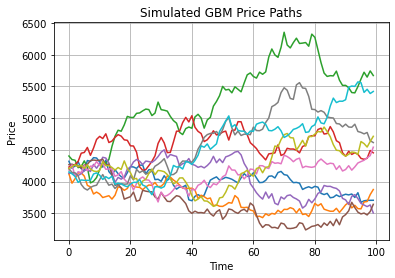

In [32]:
interest_rate = 0.02
volatility = 0.18
S0 = 4153
m = 100
n = 10

prices = simulator.gbm_paths(interest_rate, volatility, S0, m, n)
#Plotting graph, above are same as Q2
simulator.plot_gbm_paths(prices)

## Question 4

In [13]:
#European option: exercised only at expiration, hence will use price at expiration for calculation
#call = max(ST - strike price, 0)
#put = max(strike price - ST, 0)

#m increased to 2520, 252 indicates the number of trading days, multiplied by 10 to approach continous time by reducing interval of each time step while making sure the compute can still process the amount of loops
#sample numbers larger than or equal to 30 are often considered sufficient for the Central Limit Theorem to hold, here used 1000 to be sure as it does not significantly reduce compiling time.

interest_rate = 0.02
volatility = 0.18
S0 = 4153
m = 2520
n = 1000
#n = 10000

option_type = 'call'
current_date = '24012023'
expiry_date = '15122023'
strike_price = 4200

calculated_option_price = simulator.calculate_option_price(interest_rate, volatility, S0, m, n, option_type, current_date, expiry_date, strike_price)
print(f"The {option_type} option price is: {calculated_option_price:.2f}")

option_type = 'put'

calculated_option_price = simulator.calculate_option_price(interest_rate, volatility, S0, m, n, option_type, current_date, expiry_date, strike_price)
print(f"The {option_type} option price is: {calculated_option_price:.2f}")


The call option price is: 316.00
The put option price is: 278.69


## Question 5

In [2]:
interest_rate = 0.02
volatility = 0.18
S0 = 4153
m = 252000
n = 1000

option_type = 'call'
current_date = '24012023'
expiry_date = '15122023'
strike_price = 4200

#the price of an option on WORLD INDEX. WORLD INDEX will change by approximately $[delta] for a $1 change in the value of WORLD INDEX. WORLD INDEX
delta = simulator.calculate_deltas(interest_rate, volatility, S0, current_date, expiry_date)
print(f"The {option_type} option delta is: {delta:.4f}")


The call option delta is: 0.5492


## Question 6

As the number of iterations (paths) increased, the estimated option prices started to stabilised and converged, this will help determining the number of simulations needed.